# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [87]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
complete_data = pd.merge(mouse_metadata, study_results, how="right", on=["Mouse ID", "Mouse ID"])

# Display the data table for preview
complete_data.head(15)

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0
5,h246,Ketapril,Male,13,30,0,45.0,0
6,p189,Ketapril,Male,8,28,0,45.0,0
7,n923,Ketapril,Male,19,30,0,45.0,0
8,q119,Ketapril,Male,17,30,0,45.0,0
9,f993,Naftisol,Male,21,28,0,45.0,0


In [2]:
# Checking the number of mice.
mice_count = complete_data["Mouse ID"].nunique()
mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate = complete_data[complete_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
107,g989,Propriva,Female,21,26,0,45.000000,0
137,g989,Propriva,Female,21,26,0,45.000000,0
329,g989,Propriva,Female,21,26,5,48.786801,0
360,g989,Propriva,Female,21,26,5,47.570392,0
620,g989,Propriva,Female,21,26,10,51.745156,0
681,g989,Propriva,Female,21,26,10,49.880528,0
815,g989,Propriva,Female,21,26,15,51.325852,1
869,g989,Propriva,Female,21,26,15,53.442020,0
950,g989,Propriva,Female,21,26,20,55.326122,1
1111,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#complete_data.drop(complete_data[complete_data["Mouse ID"] == "g989"], inplace = True)
clean_data = complete_data[complete_data["Mouse ID"].str.contains("g989") == False]
clean_data.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,Capomulin,Female,9,22,0,45.0,0
1,f932,Ketapril,Male,15,29,0,45.0,0
2,g107,Ketapril,Female,2,29,0,45.0,0
3,a457,Ketapril,Female,11,30,0,45.0,0
4,c819,Ketapril,Male,21,25,0,45.0,0


In [5]:
# Checking the number of mice in the clean DataFrame.
clean_mice_count = clean_data["Mouse ID"].nunique()
clean_mice_count

248

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

tumor_mean = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
tumor_median = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
tumor_variance = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
tumor_sdev = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
tumor_sem = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()

tumor_summary = pd.DataFrame({"Mean Tumor Volume": tumor_mean, "Median Tumor Volume": tumor_median,
                              "Tumor Volume Variance": tumor_variance, "Tumor Volume Std. Dev.": tumor_sdev,
                              "Tumor Volume Std. Err.": tumor_sem})
tumor_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='# of Observed Mouse Timepoints'>

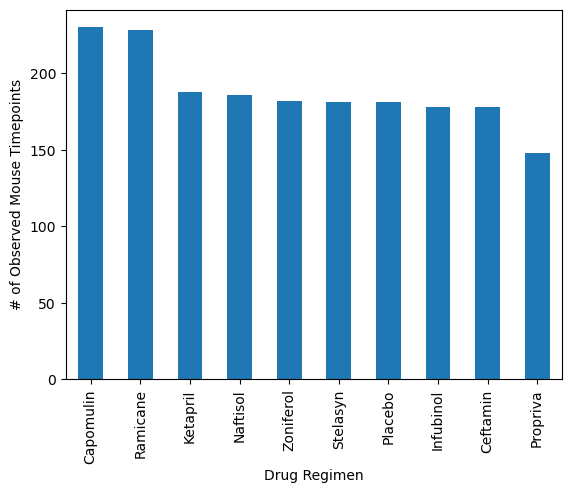

In [7]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
#Query data for each drug
timepoints = clean_data["Drug Regimen"].value_counts()
#List drugs for x axis
drugs = ["Capomulin", "Ramicane", "Ketapril", "Naftisol", "Zoniferol", "Stelasyn", "Placebo", "Infubinol", "Ceftamin", "Propriva"]
#Create
df = pd.DataFrame({"Drug":drugs, "Timepoint":timepoints})
df.plot.bar(x="Drug", y="Timepoint", xlabel="Drug Regimen", ylabel="# of Observed Mouse Timepoints", legend=False)


Text(0.5, 0, 'Drug Regimen')

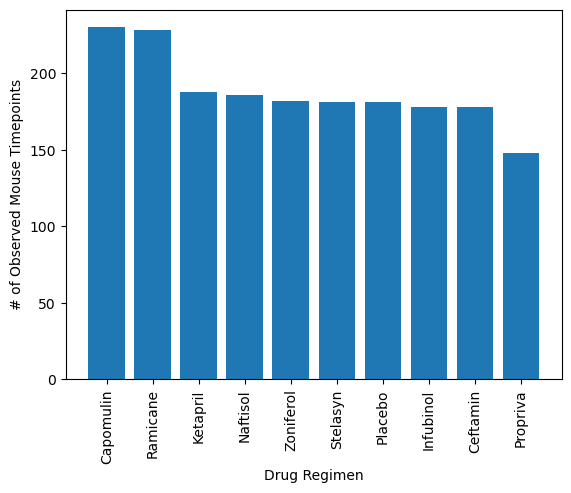

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
plt.bar(drugs, timepoints)
plt.xticks(rotation=90)
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlabel("Drug Regimen")

array([<Axes: ylabel='Sex'>], dtype=object)

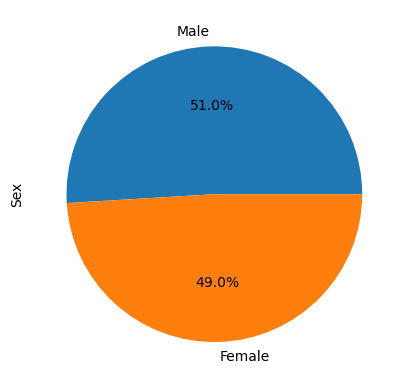

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
#Count male and female mice
male_count = clean_data["Sex"].str.count("Male").sum()
female_count = clean_data["Sex"].str.count("Female").sum()
overall_count = clean_data["Sex"].count()
#Calculate percentages
male_percent = male_count / overall_count * 100
female_percent = female_count / overall_count * 100
#Create DataFrame
percent = pd.DataFrame({"Percentages":[male_percent, female_percent]}, index=["Male", "Female"])
#Plot pie chart
percent.plot.pie(subplots=True,
                 autopct="%.1f%%",
                  ylabel="Sex",
                  legend=False)


Text(0, 0.5, 'Sex')

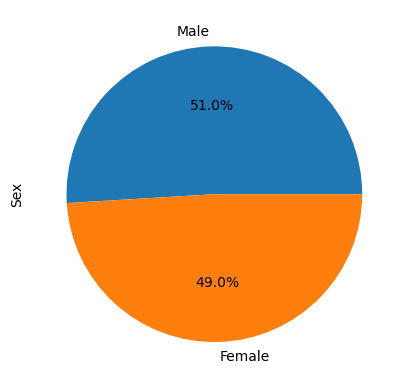

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#Use previous variables
mouse_percents = [male_percent, female_percent]
#Create labels
labels = ["Male", "Female"]
#Plot pie chart
plt.pie(mouse_percents, labels=labels, autopct="%.1f%%")
plt.ylabel("Sex")

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
max = clean_data.loc[clean_data.groupby(["Drug Regimen", "Mouse ID"])["Timepoint"].idxmax()]
tumortime = max[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)"]]
tumortime

,Mouse ID,Drug Regimen,Timepoint,Tumor Volume (mm3)
1764,b128,Capomulin,45,38.982878
1829,b742,Capomulin,45,38.939633
930,f966,Capomulin,20,30.485985
1777,g288,Capomulin,45,37.074024
1791,g316,Capomulin,45,40.159220
...,...,...,...,...
1837,q633,Zoniferol,45,70.827796
1811,s337,Zoniferol,45,62.109651
385,w140,Zoniferol,5,47.717952
1834,w575,Zoniferol,45,68.401286


In [295]:
# cap_vol = ["Tumor Volume (mm3)" for x in tumortime if "Capomulin" in x]
# ram_vol = ["Tumor Volume (mm3)" for x in tumortime if "Ramicane" in x]
# inf_vol = ["Tumor Volume (mm3)" for x in tumortime if "Infubinol" in x]
# cef_vol = ["Tumor Volume (mm3)" for x in tumortime if "Ceftamin" in x]


In [12]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)
cap_vol = []
ram_vol = []
inf_vol = []
cef_vol = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
tumorpoints = tumortime["Tumor Volume (mm3)"]
quartiles = tumorpoints.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for i , row in tumortime.iterrows():
    if tumortime.at[i, "Drug Regimen"] == "Capomulin":
        cap_vol.append(tumortime.loc[i, "Tumor Volume (mm3)"])
    elif tumortime.at[i, "Drug Regimen"] == "Ramicane":
        ram_vol.append(tumortime.loc[i, "Tumor Volume (mm3)"])
    elif tumortime.at[i, "Drug Regimen"] == "Infubinol":
        inf_vol.append(tumortime.loc[i, "Tumor Volume (mm3)"])
    elif tumortime.at[i, "Drug Regimen"] == "Ceftamin":
        cef_vol.append(tumortime.loc[i, "Tumor Volume (mm3)"])
    else:
        pass    
    
    # add subset 


drugdata = pd.DataFrame({"Capomulin": cap_vol, "Ramicane": ram_vol, "Infubinol": inf_vol, "Ceftamin": cef_vol})
    # Determine outliers using upper and lower bounds
    
#Quartiles
    #Capomulin
tumorsizes = drugdata["Capomulin"]
quartiles = tumorsizes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Capomulin potential outliers {lower_bound} {upper_bound}")

    #Ramicane
tumorsizes = drugdata["Ramicane"]
quartiles = tumorsizes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ramicane potential outliers {lower_bound} {upper_bound}")

    #Infubinol
tumorsizes = drugdata["Infubinol"]
quartiles = tumorsizes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Infubinol potential outliers {lower_bound} {upper_bound}")

    #Ceftamin
tumorsizes = drugdata["Ceftamin"]
quartiles = tumorsizes.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)

print(f"Ceftamin potential outliers {lower_bound} {upper_bound}")

Capomulin potential outliers 20.70456164999999 51.83201549
Ramicane potential outliers 17.912664470000003 54.30681135
Infubinol potential outliers 36.83290494999999 82.74144559000001
Ceftamin potential outliers 25.355449580000002 87.66645829999999


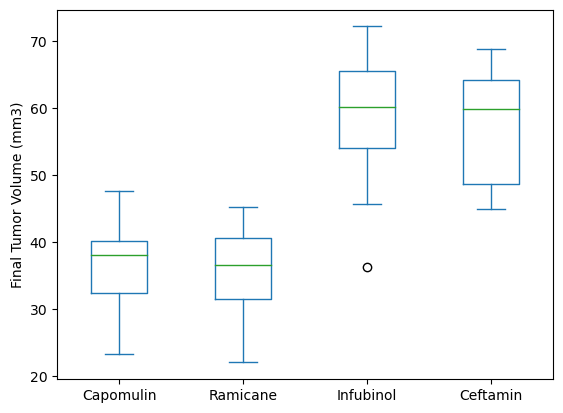

In [13]:
# Generate box plot
bp = drugdata[["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]].plot(kind="box", ylabel="Final Tumor Volume (mm3)")
plt.show()


## Line and Scatter Plots

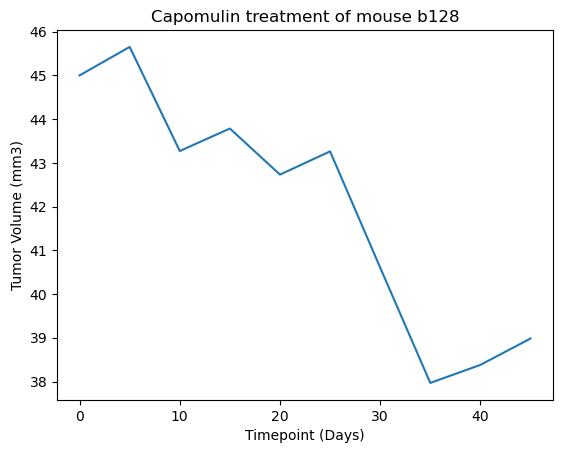

In [14]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
mouses = clean_data[["Mouse ID", "Timepoint", "Tumor Volume (mm3)"]]
imouses = mouses.set_index("Mouse ID")
b128 = imouses.loc["b128"]
b128plot = b128.plot.line(x="Timepoint", y="Tumor Volume (mm3)", xlabel = "Timepoint (Days)", ylabel= "Tumor Volume (mm3)", title="Capomulin treatment of mouse b128", legend=False)

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

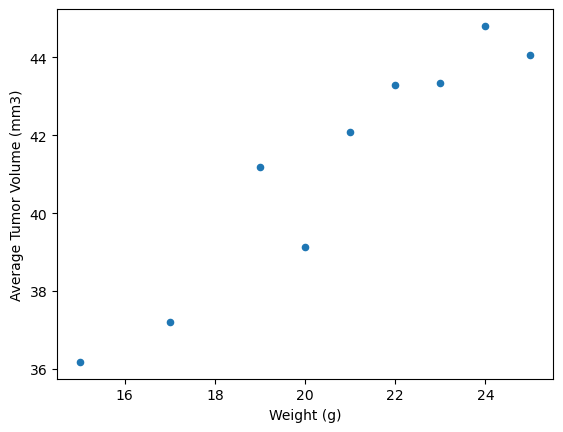

In [99]:
#Isolate Capomulin mice
simpmice = clean_data[["Mouse ID", "Drug Regimen", "Timepoint", "Tumor Volume (mm3)", "Weight (g)"]]
isimpmice = simpmice.set_index("Drug Regimen")
capmice = isimpmice.loc["Capomulin"]

#Calculate average tumor size for mice weights
capmicetumor = capmice.groupby("Weight (g)")["Tumor Volume (mm3)"].mean()
capmiceweight = capmice.groupby("Weight (g)").size()

#Create DataFrame
cappymice = pd.DataFrame({"Average Tumor Volume (mm3)":capmicetumor})

#Plot
cappymice.reset_index().plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")

<Axes: xlabel='Weight (g)', ylabel='Average Tumor Volume (mm3)'>

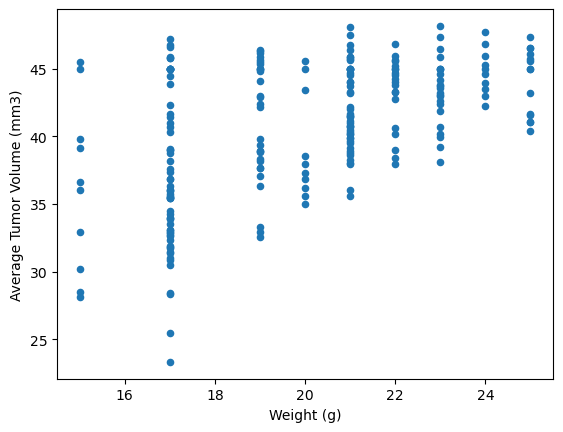

In [103]:
capmiceweight = capmice["Weight (g)"]
capmicetumor = capmice["Tumor Volume (mm3)"]

cappymice = pd.DataFrame({"Weight (g)":capmiceweight, "Average Tumor Volume (mm3)":capmicetumor})
#Plot
cappymice.reset_index().plot(kind="scatter", x="Weight (g)", y="Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.53


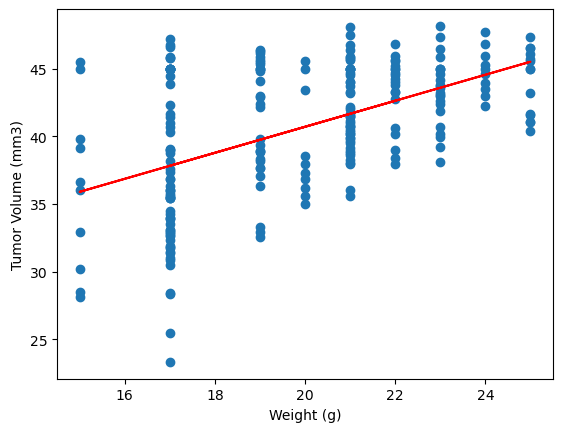

In [104]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation = st.pearsonr(capmiceweight, capmicetumor)
print(f"The correlation between both factors is {round(correlation[0],2)}")

x_values = capmiceweight
y_values = capmicetumor

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Tumor Volume (mm3)")
plt.show()
